# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [2]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns))

fires_dt = fires_dt.drop(index=0)
fires_dt.head()


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0


# Get X and Y

Create the features data frame and target data.

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your original DataFrame
# Create the features dataframe X
X = fires_dt.drop(columns='area')

# Create the target dataframe Y
Y = fires_dt['area']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [4]:
# preproc1

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_cols = ['coord_x', 'coord_y' ,'ffmc', 'dmc', 'dc', 'isi', 'temp', 'wind', 'rain', 'rh',]

cat_cols = ['month', 'day']

pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardizer', StandardScaler())
])

pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='if_binary'))
])

preproc1 = ColumnTransformer([
    ('num_transforms', pipe_num, num_cols),
    ('cat_transforms', pipe_cat, cat_cols),
], remainder='drop')

preproc1

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardizer',
                                                  StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'wind', 'rain', 'rh']),
                                ('cat_transforms',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardizer',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [5]:
# preproc2
from sklearn.preprocessing import StandardScaler, SplineTransformer

num_cols = ['coord_x', 'coord_y','ffmc', 'dmc', 'dc', 'isi']
num_cols_transform = ['temp', 'wind', 'rain', 'rh']

cat_cols = ['month', 'day']

pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardizer', StandardScaler())
])

pipe_num_trnfrm = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardizer', StandardScaler()),
    ('transformer', SplineTransformer() )
])

pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist', drop='if_binary'))
])

preproc2 = ColumnTransformer([
    ('num_scaler', pipe_num, num_cols),
    ('num_transforms', pipe_num_trnfrm, num_cols_transform),
    ('cat_transforms', pipe_cat, cat_cols),
], remainder='drop')

preproc2

ColumnTransformer(transformers=[('num_scaler',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardizer',
                                                  StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi']),
                                ('num_transforms',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardizer',
                                                  StandardScaler()),
                                                 ('transformer',
                                                  SplineTransformer())]),
                                 ['temp', 'wind', 'rain', 'rh']),
                                ('cat_transforms',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardizer',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [6]:
# Pipeline A = preproc1 + baseline
from sklearn.linear_model import LinearRegression, Lasso

pipe_model1 = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', LinearRegression())
])

pipe_model1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'wind', 'rain', 'rh']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardizer',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [7]:
# Pipeline B = preproc2 + baseline

pipe_model2 = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', Lasso())
])

pipe_model2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi']),
                                                 ('num_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardizer',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   SplineTransformer())]),
                                                  ['temp', 'wind', 'rain',
                                                   'rh']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardizer',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', Lasso())])

In [8]:
# Pipeline C = preproc1 + advanced model
from sklearn.tree import DecisionTreeRegressor

pipe_model3 = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', DecisionTreeRegressor())
])

pipe_model3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'wind', 'rain', 'rh']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardizer',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', DecisionTreeRegressor())])

In [33]:
# Pipeline D = preproc2 + advanced model
from sklearn.gaussian_process import GaussianProcessRegressor

pipe_model4 = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', GaussianProcessRegressor())
])

pipe_model4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi']),
                                                 ('num_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardizer',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   SplineTransformer())]),
                                                  ['temp', 'wind', 'rain',
                                                   'rh']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardizer',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', GaussianProcessRegressor())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [10]:
from sklearn.model_selection import GridSearchCV

scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
param_grid1 = {
        'regressor__n_jobs': [5, 10, 15, 20]
            }

grid_cv1 = GridSearchCV(
    estimator=pipe_model1, 
    param_grid=param_grid1, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")

grid_cv1.fit(X_train, Y_train)

c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\en

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_transforms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'wind',
                                                                          'rain',
                                                                          'rh']),
                                                                        ('cat_transforms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardizer',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__n_jobs': [5, 10, 15, 20]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [11]:
res1 = grid_cv1.cv_results_
res1 = pd.DataFrame(res1)
res1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_jobs,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.043107,0.024352,0.012240,0.004254,5,{'regressor__n_jobs': 5},-44.160022,-26.247083,-31.031591,-90.80185,...,4.166734,1,-0.051824,-0.260907,-1.161384,-0.00924,-0.186038,-0.333879,0.423531,1
1,0.020934,0.010765,0.012938,0.009786,10,{'regressor__n_jobs': 10},-44.160022,-26.247083,-31.031591,-90.80185,...,4.166734,1,-0.051824,-0.260907,-1.161384,-0.00924,-0.186038,-0.333879,0.423531,1
2,0.023187,0.010241,0.014573,0.003318,15,{'regressor__n_jobs': 15},-44.160022,-26.247083,-31.031591,-90.80185,...,4.166734,1,-0.051824,-0.260907,-1.161384,-0.00924,-0.186038,-0.333879,0.423531,1
3,0.025167,0.005010,0.009181,0.005791,20,{'regressor__n_jobs': 20},-44.160022,-26.247083,-31.031591,-90.80185,...,4.166734,1,-0.051824,-0.260907,-1.161384,-0.00924,-0.186038,-0.333879,0.423531,1


In [12]:
grid_cv1.best_params_

{'regressor__n_jobs': 5}

In [13]:
model1 = grid_cv1.best_estimator_

In [14]:
param_grid2 = {
        'regressor__alpha': [0.1, 0.10, 0.15, 0.20]
            }

grid_cv2 = GridSearchCV(
    estimator=pipe_model2, 
    param_grid=param_grid2, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")

grid_cv2.fit(X_train, Y_train)


c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\en

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_scaler',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi']),
                                                                        ('num_transforms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardizer',
                                                                                          Stan...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardizer',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [0.1, 0.1, 0.15, 0.2]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [15]:
res2 = grid_cv2.cv_results_
res2 = pd.DataFrame(res2)
res2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.042045,0.013330,0.019235,0.006063,0.1,{'regressor__alpha': 0.1},-43.980394,-26.698117,-25.314967,-90.879767,...,4.272067,3,-0.043284,-0.304615,-0.438397,-0.010972,-0.111383,-0.181730,0.163861,3
1,0.031488,0.010578,0.017564,0.010910,0.1,{'regressor__alpha': 0.1},-43.980394,-26.698117,-25.314967,-90.879767,...,4.272067,3,-0.043284,-0.304615,-0.438397,-0.010972,-0.111383,-0.181730,0.163861,3
2,0.030347,0.005225,0.017856,0.011469,0.15,{'regressor__alpha': 0.15},-43.737639,-26.440963,-24.978838,-90.823977,...,4.296272,2,-0.031799,-0.279604,-0.400453,-0.009732,-0.092251,-0.162768,0.152112,2
3,0.036182,0.012384,0.019961,0.004101,0.2,{'regressor__alpha': 0.2},-43.546818,-26.290878,-24.742123,-90.765579,...,4.267612,1,-0.022815,-0.265119,-0.374035,-0.008433,-0.082133,-0.150507,0.144406,1


In [16]:
grid_cv2.best_params_

{'regressor__alpha': 0.2}

In [17]:
model2 = grid_cv2.best_estimator_

In [18]:
param_grid3 = {
        'regressor__max_depth': [10,20,30,40]
    }

grid_cv3 = GridSearchCV(
    estimator=pipe_model3, 
    param_grid=param_grid3, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")

grid_cv3.fit(X_train, Y_train)

c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\en

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_transforms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'wind',
                                                                          'rain',
                                                                          'rh']),
                                                                        ('cat_transforms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardizer',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', DecisionTreeRegressor())]),
             param_grid={'regressor__max_depth': [10, 20, 30, 40]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [19]:
res3 = grid_cv3.cv_results_
res3 = pd.DataFrame(res3)
res3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.036767,0.016127,0.018760,0.005736,10,{'regressor__max_depth': 10},-105.662288,-47.468413,-36.149433,-105.849611,...,9.204693,1,-5.021773,-3.124113,-1.933100,-0.371461,-0.457724,-2.181634,1.747284,1
1,0.027424,0.008418,0.000000,0.000000,20,{'regressor__max_depth': 20},-106.918555,-44.567858,-96.323960,-106.654895,...,9.677009,4,-5.165815,-2.635504,-19.825363,-0.392408,-0.525461,-5.708910,7.268402,4
2,0.024539,0.007613,0.000000,0.000000,30,{'regressor__max_depth': 30},-106.023936,-40.787790,-93.356384,-109.054844,...,9.912856,3,-5.063064,-2.044959,-18.561942,-0.455777,-0.523387,-5.329826,6.823615,3
3,0.028102,0.010293,0.011926,0.007072,40,{'regressor__max_depth': 40},-105.346351,-50.898515,-33.702276,-108.705704,...,10.386778,2,-4.985815,-3.741670,-1.549426,-0.446470,-0.517846,-2.248245,1.814036,2


In [20]:
grid_cv3.best_params_

{'regressor__max_depth': 10}

In [21]:
model3 = grid_cv3.best_estimator_

In [34]:
param_grid4 = {
        'regressor__n_restarts_optimizer': [10,15, 20, 25]
    }

grid_cv4 = GridSearchCV(
    estimator=pipe_model4, 
    param_grid=param_grid4, 
    scoring = scoring, 
    cv = 5,
    refit = "neg_root_mean_squared_error")

grid_cv4.fit(X_train, Y_train)

c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\envs\scaletoprod\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Admin\miniconda3\en

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num_scaler',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardizer',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi']),
                                                                        ('num_transforms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardizer',
                                                                                          Stan...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardizer',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        GaussianProcessRegressor())]),
             param_grid={'regressor__n_restarts_optimizer': [10, 15, 20, 25]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'r2'])

In [35]:
res4 = grid_cv4.cv_results_
res4 = pd.DataFrame(res4)
res4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_restarts_optimizer,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.064337,0.013172,0.021494,0.003847,10,{'regressor__n_restarts_optimizer': 10},-49.879203,-69.066566,-24.727501,-93.181961,...,4.769024,1,-0.34191,-7.730856,-0.372412,-0.062842,-0.506314,-1.802867,2.967504,1
1,0.048459,0.006892,0.019321,0.004748,15,{'regressor__n_restarts_optimizer': 15},-49.879203,-69.066566,-24.727501,-93.181961,...,4.769024,1,-0.34191,-7.730856,-0.372412,-0.062842,-0.506314,-1.802867,2.967504,1
2,0.046114,0.004840,0.019381,0.001909,20,{'regressor__n_restarts_optimizer': 20},-49.879203,-69.066566,-24.727501,-93.181961,...,4.769024,1,-0.34191,-7.730856,-0.372412,-0.062842,-0.506314,-1.802867,2.967504,1
3,0.045187,0.008495,0.021714,0.001871,25,{'regressor__n_restarts_optimizer': 25},-49.879203,-69.066566,-24.727501,-93.181961,...,4.769024,1,-0.34191,-7.730856,-0.372412,-0.062842,-0.506314,-1.802867,2.967504,1


In [36]:
grid_cv4.best_params_

{'regressor__n_restarts_optimizer': 10}

In [37]:
model4 = grid_cv4.best_estimator_

In [44]:
from sklearn.metrics import root_mean_squared_error, r2_score
Y_pred1 = model1.predict(X_test)
mse1 = root_mean_squared_error(Y_test, Y_pred1)
r2_1 = r2_score(Y_test, Y_pred1)
print(f"Model 1 R^2: {r2_1}")
print(f"Model1 RSME:  {mse1}")


Y_pred2 = model2.predict(X_test)
mse2 = root_mean_squared_error(Y_test, Y_pred2)
r2_2 = r2_score(Y_test, Y_pred2)
print(f"Model 2 R^2: {r2_2}")
print(f"Model2 RSME: {mse2}")

Y_pred3 = model3.predict(X_test)
mse3 = root_mean_squared_error(Y_test, Y_pred3)
r2_3 = r2_score(Y_test, Y_pred3)
print(f"Model 3 R^2: {r2_3}")
print(f"Model3 RSME: {mse3}")

Y_pred4 = model4.predict(X_test)
mse4 = root_mean_squared_error(Y_test, Y_pred4)
r2_4 = r2_score(Y_test, Y_pred4)
print(f"Model 4 R^2: {r2_4}")
print(f"Model4 RSME: {mse4}")

Model 1 R^2: 0.016013131865261654
Model1 RSME:  88.49005048187826
Model 2 R^2: 0.00941606196902045
Model2 RSME: 88.78619256660654
Model 3 R^2: -0.6321702233758106
Model3 RSME: 113.9678923630168
Model 4 R^2: -0.04711340634582073
Model4 RSME: 91.28441812110742


# Evaluate

+ Which model has the best performance?

Upon evaluating the Root Mean Squared Error and R2 of each models, the model 1 (Linear Regression) has lowest error when compared to other models. Model 2 (Lasso Regression) performs close to model 1, while model 3 (Decision Tree Regression) and model 4(Gaussian Regression) has negative R2 which indicates the model doesn't perform better.


|Model  |	R²  |   	RMSE|	Interpretation                                      |
|:------|:------|:----------|:------------------------------------------------------|
|1	    |0.0160 |	88.49	|Slightly positive R², lowest RMSE among all models.    |
|2	    |0.0094	|    88.79	|Slightly positive R², but higher RMSE than Model 1.    |
|3	    |-0.6322|	113.97	|Negative R², indicating poor performance, highest RMSE.|
|4	    |-0.0471|	91.28	|Negative R², indicating poor performance, higher RMSE. |


# Export

+ Save the best performing model to a pickle file.

In [46]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(model1, f)


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [49]:
with open('best_model.pkl', 'rb') as file:
    pipe = pickle.load(file)

pipe

import shap
data_transform = pipe.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.Linear(
    pipe.named_steps['regressor'], 
    data_transform,
    feature_names = pipe.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform)

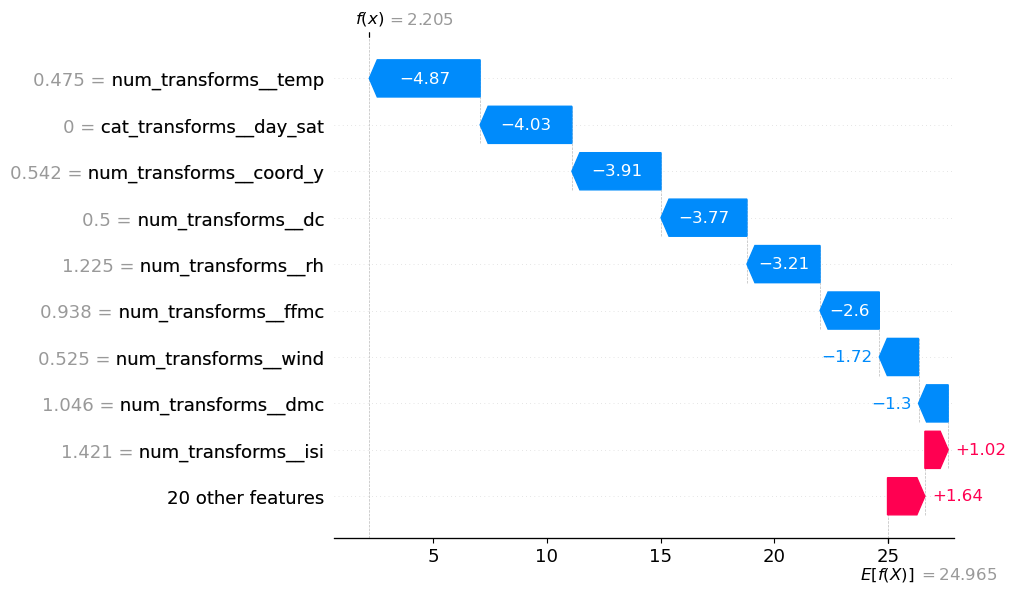

In [43]:
shap.plots.waterfall(shap_values[1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


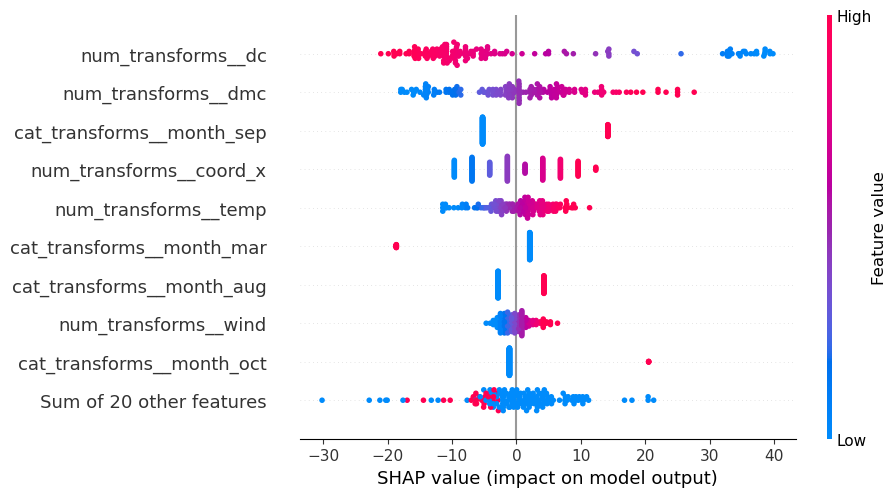

In [50]:
shap.plots.beeswarm(shap_values)

- Applying non linear transformations on the features are not very useful and negatively contributing to the model except for the feature 'isi', apart from this features I would remove transformation on all other features.
- From the above diagram, looks like Wind and temperature are most important, month and day are least important.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.